   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtyp

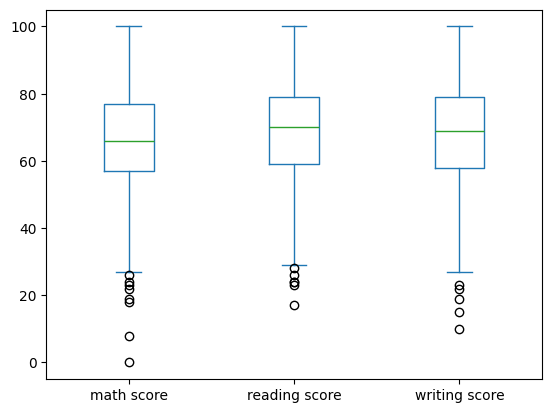

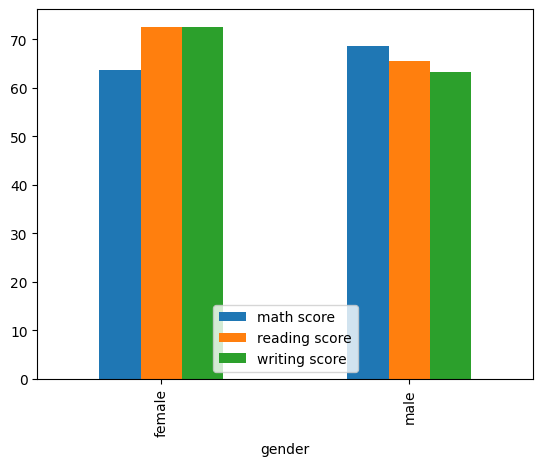

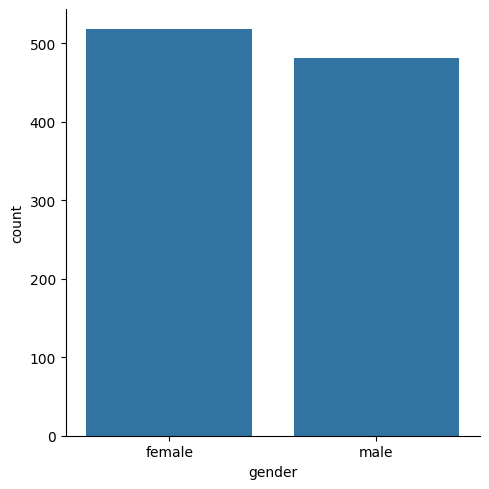

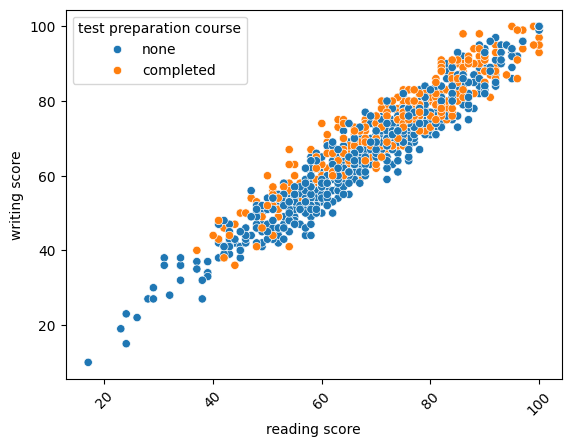

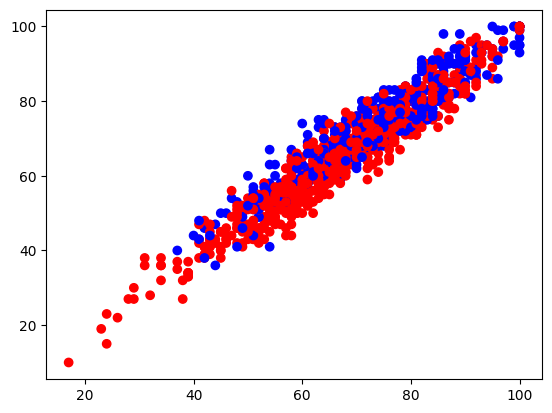

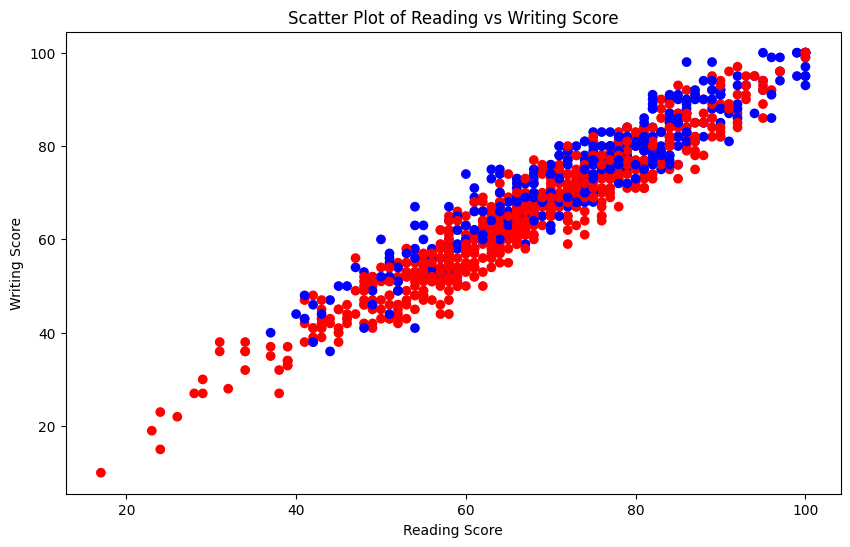

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tkinter import filedialog
import tkinter as tk

# Ask the user to select a CSV file using a file dialog.
root = tk.Tk()
root.withdraw()

# Prompt the user to select a CSV file interactively.
csv_file = filedialog.askopenfilename(title="Select a CSV file", filetypes=[("CSV files", "*.csv")])

# Check if a file was selected; exit if not.
if not csv_file:
    print("No file selected. Exiting.")
else:
    # Read the selected CSV file into a DataFrame and display the first few rows.
    df = pd.read_csv(csv_file)
    print("Displaying the first few rows of the dataset:")
    print(df.head())

    # Display basic information about the DataFrame and its columns.
    print("Basic information about the dataset:")
    print(df.info())

    # Display statistical information about math, reading, and writing scores.
    print("Statistical information about scores:")
    print(df[['math score', 'reading score', 'writing score']].describe())

    # Group the data by race/ethnicity and show mean scores.
    print("Mean scores by race/ethnicity:")
    print(df.groupby('race/ethnicity')[['math score', 'reading score', 'writing score']].mean())

    # Display a single column ('math score') as a DataFrame.
    print("Math scores as a DataFrame:")
    print(df[['math score']])

    # Display a single column ('math score') as a Series using bracket notation.
    print("Math scores as a Series (bracket notation):")
    print(df['math score'])

    # Display rows for females with math scores greater than or equal to 90.
    print("Females with math score >= 90:")
    print(df[(df['gender'] == 'female') & (df['math score'] >= 90)])

    # Create a box plot to visualize score distributions.
    df[['math score', 'reading score', 'writing score']].plot(kind='box')
    plt.title('Box Plot of Scores')
    plt.show()

    # Calculate and display average scores by gender, then create a bar plot.
    gender_avg_scores = df.groupby('gender')[['math score', 'reading score', 'writing score']].mean()
    gender_avg_scores.plot(kind='bar')
    plt.title('Average Scores by Gender')
    plt.show()

    # Create a count plot to visualize gender distribution.
    sns.catplot(data=df, x='gender', kind='count')
    plt.title('Gender Distribution')
    plt.show()

    # Create a scatter plot comparing writing and reading scores, color-coded by test prep course.
    sns.scatterplot(data=df, x='reading score', y='writing score', hue='test preparation course')
    plt.title('Scatter Plot of Reading vs. Writing Score (by Test Prep Course)')
    plt.show()

    # Create the same scatter plot with different colors.
    plt.scatter(df['reading score'], df['writing score'], c=df['test preparation course'].map({'completed': 'blue', 'none': 'red'}))
    plt.title('Scatter Plot of Reading vs. Writing Score (by Test Prep Course)')
    plt.show()

    # Adjust the size of the scatter plot for better visibility.
    plt.figure(figsize=(10, 6))
    plt.scatter(df['reading score'], df['writing score'], c=df['test preparation course'].map({'completed': 'blue', 'none': 'red'}))
    plt.xlabel('Reading Score')
    plt.ylabel('Writing Score')
    plt.title('Scatter Plot of Reading vs. Writing Score (by Test Prep Course)')
    plt.show()

